# The Impact of Climate on City Crime

### *Project Goal*:
> *Determine the effects of climate on city crime by using regression analysis.*

### *Methodology*:
*Data of average temperature and average precipitation for quarterly and monthly periods was taken from NOAA (Natural Centers for Environmental Information).*  

*Data of frequency of several different types of crime for quarterly and monthly periods was taken from NYCdata.gov.*

*Data was grouped by monthly average from 2006 to 2020, and fit to a regression line to determine the relationship between various crimes and average temperature.*

### *Results:*

*The analysis results in strong evidence between average temperature and frequency of crime. No relationship between precipitation and frequency of crime can be concluded as there is not enoughevidence of correlation. The principal explanation for the association between average temperature and frequency of crime is that warmer weather increases the number of people being outside, which in turn increases the chances for crimes to be committed.*

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd

sns.set_palette('flare')

### Helper Methods

In [9]:
def get_precip(data):
    return ols("PRCP ~ OFNS_DESC", data = data).fit()

In [10]:
def get_temp(data):
    return ols("TEMP ~ OFNS_DESC", data = data).fit()

In [11]:
def summary_csv(lst):
    idx = 0
    index = ['All', 'Burglary', 'Assault', 'Sex Crime']
    dct = {}
    for i in lst:
        temp_lst = [i.rsquared, i.pvalues[1], i.fvalue]

        curr_index = index[idx]

        dct[curr_index] = temp_lst
        idx = idx+1
    return pd.DataFrame.from_dict(dct, orient = 'index', 
                                      columns = ['r2', 'p-value', 'f-value'])
 


In [12]:
def get_corr_coef(lst):
    temp = []
    for i in lst:
        temp.append(i.corr().iloc[3,4])
    return temp

# Average Temperature | Crime Frequency

### *Monthly Period*

In [3]:
all_monthly = pd.read_csv('all_monthly_final.csv')
all_monthly = all_monthly.sample(n = 100)

burg_monthly = pd.read_csv('burg_monthly_final.csv')
burg_monthly = burg_monthly.sample(n = 100)

assault_monthly = pd.read_csv('assault_monthly_final.csv')
assault_monthly = assault_monthly.sample(n = 100)

sc_monthly = pd.read_csv('sc_monthly_final.csv')
sc_monthly = sc_monthly.sample(n = 100)


In [52]:
monthly_lst = [get_temp(all_monthly), get_temp(burg_monthly), 
               get_temp(assault_monthly), get_temp(sc_monthly)]
monthly = summary_csv(monthly_lst)

#### Model Results

| **Crime Type**      | **R<sup>2</sup>**| **p-value** | **f-value**| **Correlation Coefficient**|
| :--- :                |    :----:      |    :----:   |    :----:| :----: |
| All Crime |     0.566307|1.767591e-19|127.966123|.656
| Burglary |      0.408267|8.468890e-13	|67.615223|.632 
| Assault | 0.633664	|4.284530e-23		|169.514108 |.796
|Sex Crime |0.049616|2.591297e-02|7.086431 |.227

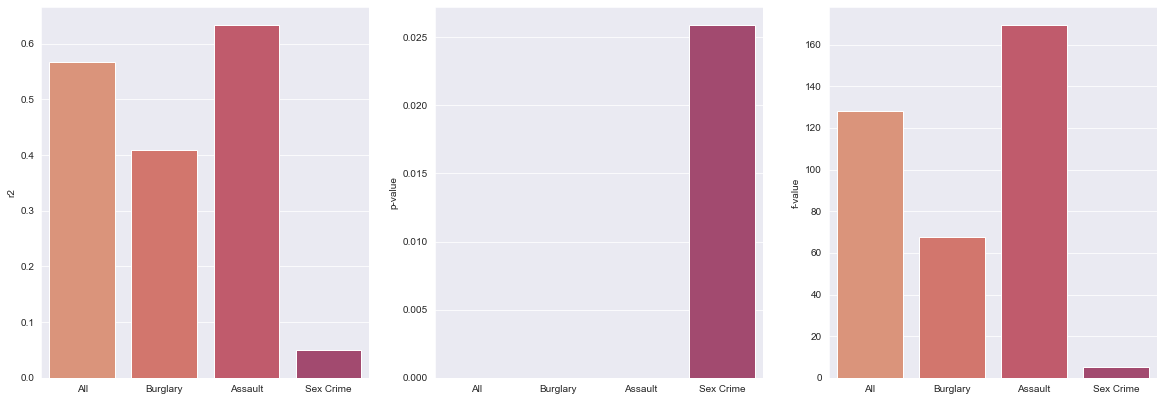

In [57]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(231)
ax1 = sns.barplot(x = monthly.index, y = 'r2', data = monthly)

ax2 = fig.add_subplot(232)
ax2 = sns.barplot(x = monthly.index, y = 'p-value', data = monthly)

ax3 = fig.add_subplot(233)
ax3 = sns.barplot(x = monthly.index, y = 'f-value', data = monthly)
fig.savefig('monthly_non_std.png', bbox_inches = 'tight', dpi = 400)
plt.show()

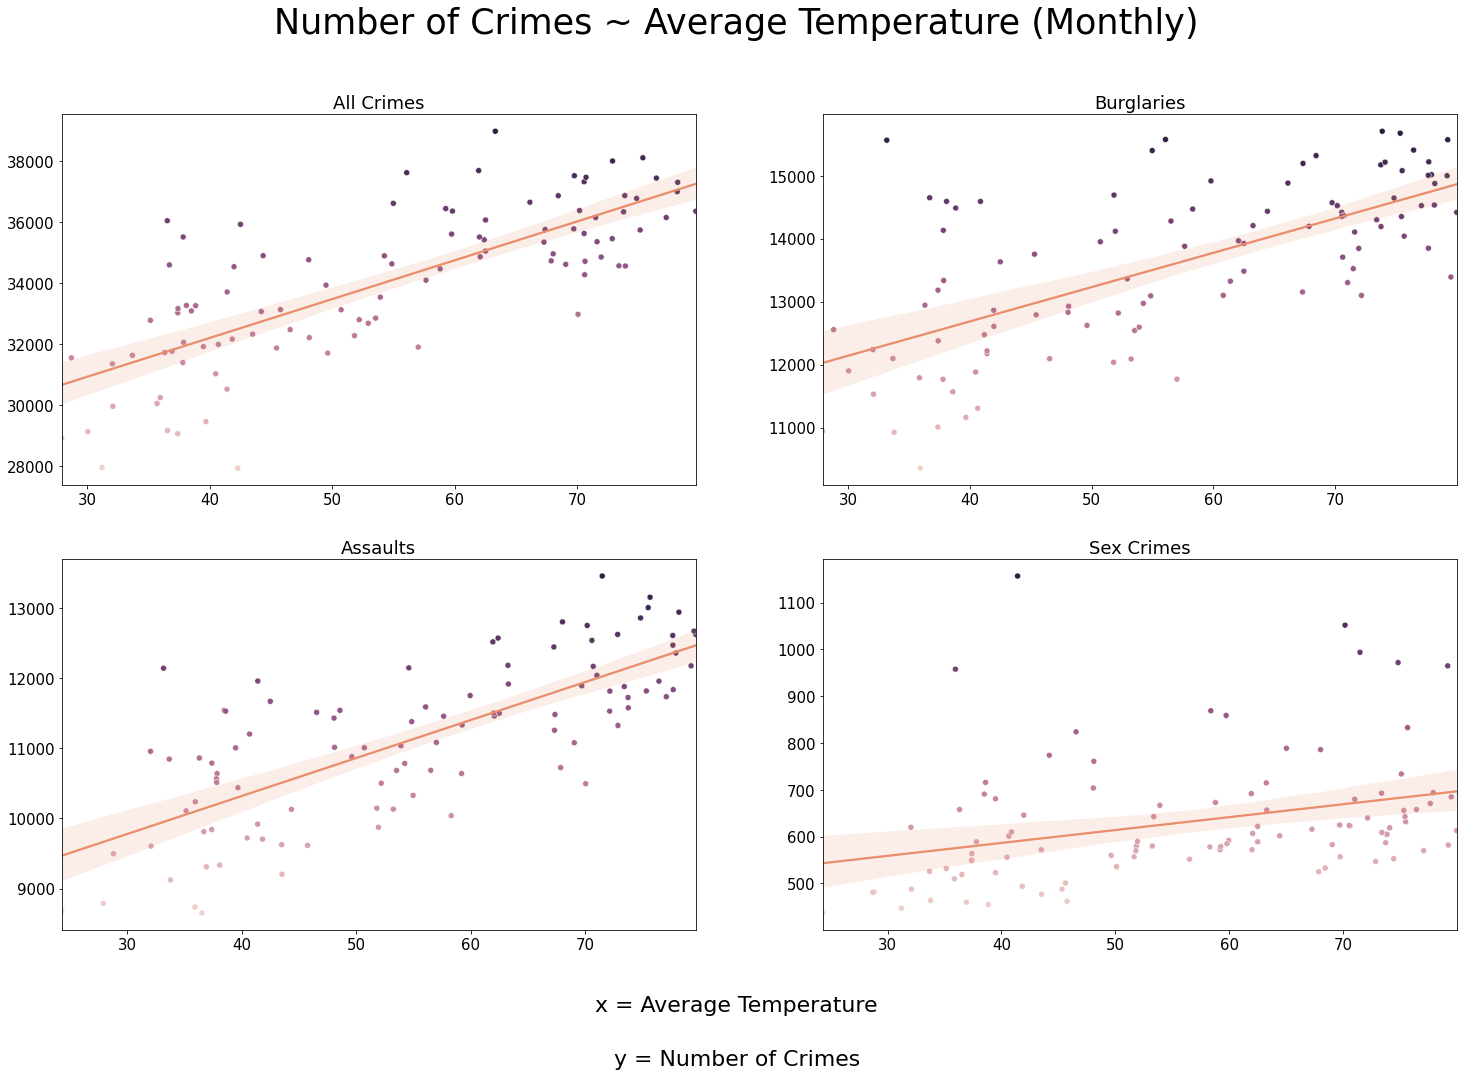

In [4]:
fig = plt.figure(figsize = (25,15))
ax1 = fig.add_subplot(221)
ax1 = sns.scatterplot(x='TEMP', y = 'OFNS_DESC', data = all_monthly, hue = 'OFNS_DESC')
ax1 = sns.regplot(x='TEMP', y = 'OFNS_DESC', data = all_monthly, scatter=False)
ax1.get_legend().remove()
ax1.set_title('All Crimes', fontsize = 18)
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.tick_params(axis='both', which='major', labelsize=15)


ax2 = fig.add_subplot(222)
ax2 = sns.scatterplot(x='TEMP', y = 'OFNS_DESC', data = burg_monthly, hue = 'OFNS_DESC')
ax2 = sns.regplot(x='TEMP', y = 'OFNS_DESC', data = burg_monthly, scatter=False)
ax2.get_legend().remove()
ax2.set_title('Burglaries', fontsize = 18)
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.tick_params(axis='both', which='major', labelsize=15)


ax3 = fig.add_subplot(223)
ax3 = sns.scatterplot(x='TEMP', y = 'OFNS_DESC', data = assault_monthly, hue = 'OFNS_DESC')
ax3 = sns.regplot(x='TEMP', y = 'OFNS_DESC', data = assault_monthly, scatter=False)
ax3.get_legend().remove()
ax3.set_title('Assaults', fontsize=18)
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.tick_params(axis='both', which='major', labelsize=15)


ax4 = fig.add_subplot(224)
ax4 = sns.scatterplot(x='TEMP', y = 'OFNS_DESC', data = sc_monthly, hue = 'OFNS_DESC')
ax4 = sns.regplot(x='TEMP', y = 'OFNS_DESC', data = sc_monthly, scatter=False)
ax4.get_legend().remove()
ax4.set_title('Sex Crimes', fontsize = 18)
ax4.set_ylabel('')
ax4.set_xlabel('')
ax4.tick_params(axis='both', which='major', labelsize=15)

fig.text(0.5, 0.05, 'x = Average Temperature', ha='center', fontsize=22)
fig.text(0.5, 0, 'y = Number of Crimes', ha='center', fontsize=22)
fig.suptitle('Number of Crimes ~ Average Temperature (Monthly)', fontsize=35)
fig.savefig('replot_monthly.png', bbox_inches = 'tight', dpi = 200)
plt.show()

### *Quarterly Period*

In [6]:
all_quart = pd.read_csv('all_quart_final.csv')

burg_quart = pd.read_csv('burg_quart_final.csv')

assault_quart = pd.read_csv('assault_quart_final.csv')

sc_quart = pd.read_csv('sc_quart_final.csv')

In [23]:
quart_lst = [get_temp(all_quart), get_temp(burg_quart), 
               get_temp(assault_quart), get_temp(sc_quart)]
quart_dct = summary_csv(quart_lst)

#### Model Results

| **Crime Type**      | **R<sup>2</sup>**| **p-value** | **f-value**| **Correlation Coefficient**|
| :--- :                |    :----:      |    :----:   |    :----:| :----: |
| All Crime |      0.448710|5.611267e-08|40.696420|.679
| Burglary |      	0.456286|3.939837e-08|41.960052|.684
| Assault | 0.587070|3.607069e-11|71.085897|.785
|Sex Crime | 0.046518|1.246301e-01|2.439389|.215

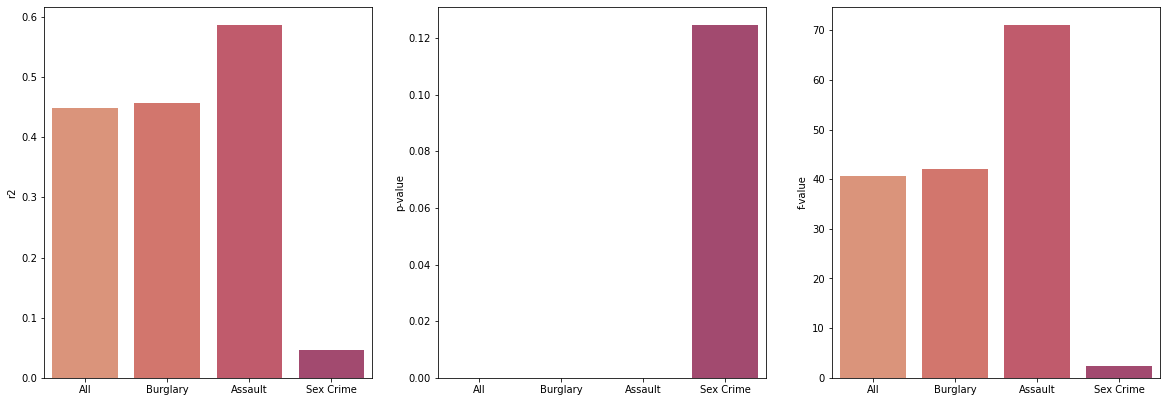

In [382]:
fig = plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(231)
ax1 = sns.barplot(x = monthly.index, y = 'r2', data = quart_dct)

ax2 = fig.add_subplot(232)
ax2 = sns.barplot(x = monthly.index, y = 'p-value', data = quart_dct)

ax3 = fig.add_subplot(233)
ax3 = sns.barplot(x = monthly.index, y = 'f-value', data = quart_dct)

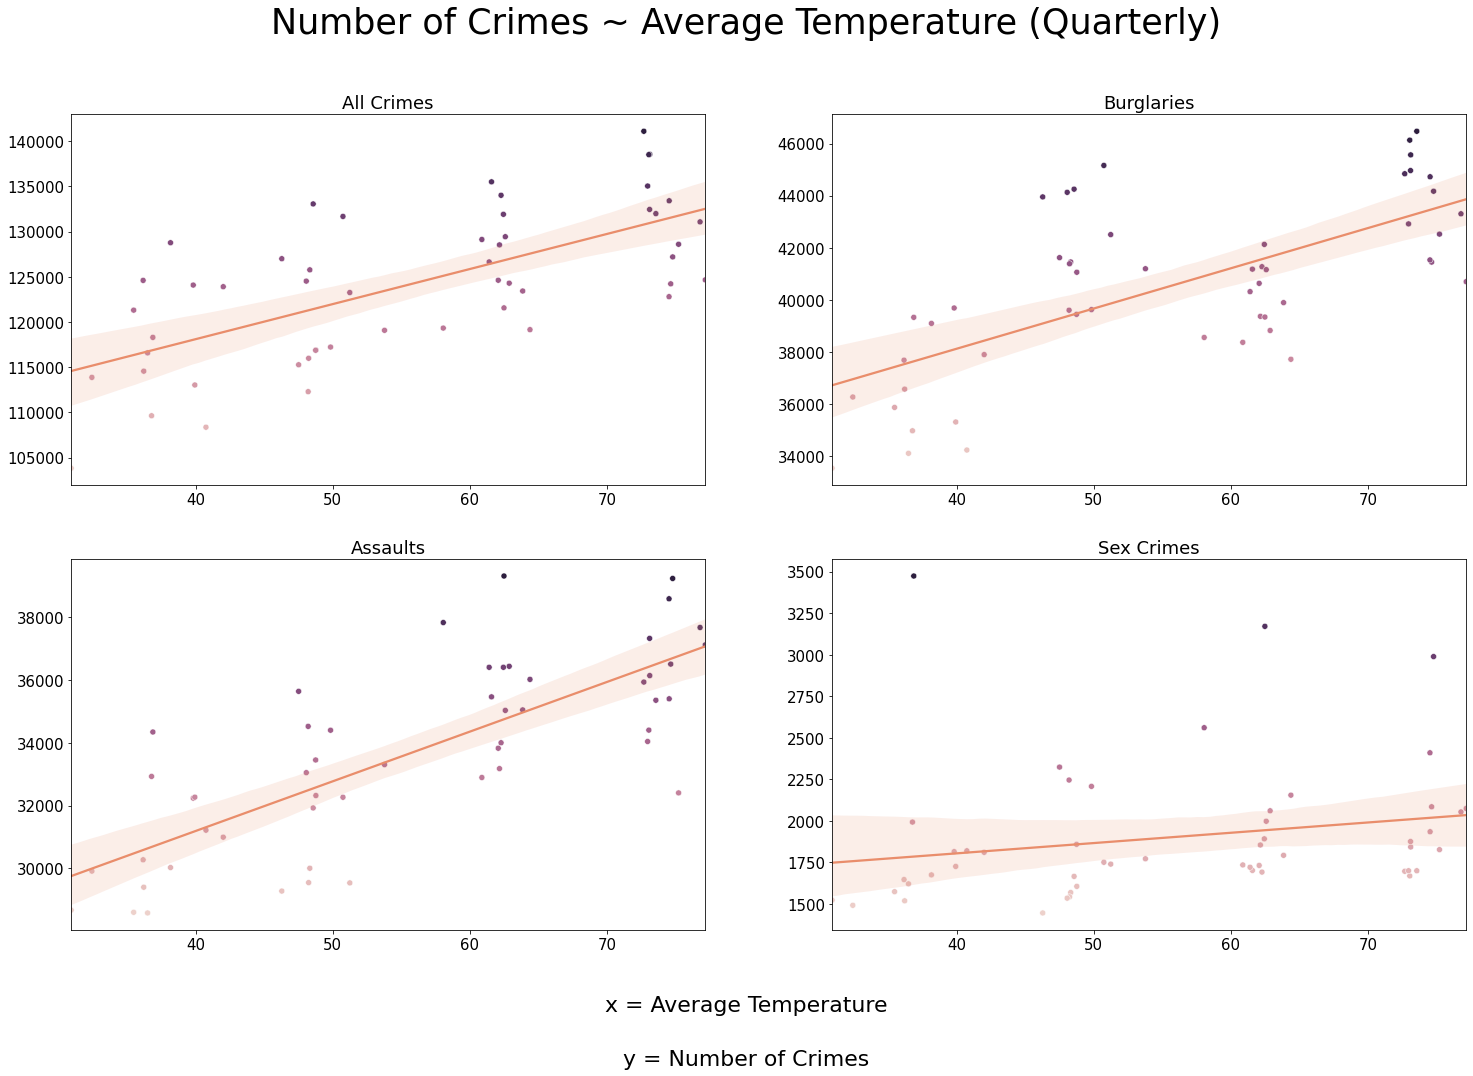

In [13]:
fig = plt.figure(figsize = (25,15))
ax1 = fig.add_subplot(221)
ax1 = sns.scatterplot(x='TEMP', y = 'OFNS_DESC', data = all_quart, hue = 'OFNS_DESC')
ax1 = sns.regplot(x='TEMP', y = 'OFNS_DESC', data = all_quart, scatter=False)
ax1.get_legend().remove()
ax1.set_title('All Crimes', fontsize = 18)
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.tick_params(axis='both', which='major', labelsize=15)


ax2 = fig.add_subplot(222)
ax2 = sns.scatterplot(x='TEMP', y = 'OFNS_DESC', data = burg_quart, hue = 'OFNS_DESC')
ax2 = sns.regplot(x='TEMP', y = 'OFNS_DESC', data = burg_quart, scatter=False)
ax2.get_legend().remove()
ax2.set_title('Burglaries', fontsize = 18)
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.tick_params(axis='both', which='major', labelsize=15)

ax3 = fig.add_subplot(223)
ax3 = sns.scatterplot(x='TEMP', y = 'OFNS_DESC', data = assault_quart, hue = 'OFNS_DESC')
ax3 = sns.regplot(x='TEMP', y = 'OFNS_DESC', data = assault_quart, scatter=False)
ax3.get_legend().remove()
ax3.set_title('Assaults', fontsize=18)
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.tick_params(axis='both', which='major', labelsize=15)


ax4 = fig.add_subplot(224)
ax4 = sns.scatterplot(x='TEMP', y = 'OFNS_DESC', data = sc_quart, hue = 'OFNS_DESC')
ax4 = sns.regplot(x='TEMP', y = 'OFNS_DESC', data = sc_quart, scatter=False)
ax4.get_legend().remove()
ax4.set_title('Sex Crimes', fontsize = 18)
ax4.set_ylabel('')
ax4.set_xlabel('')
ax4.tick_params(axis='both', which='major', labelsize=15)

fig.text(0.5, 0.05, 'x = Average Temperature', ha='center', fontsize=22)
fig.text(0.5, 0, 'y = Number of Crimes', ha='center', fontsize=22)
fig.suptitle('Number of Crimes ~ Average Temperature (Quarterly)', fontsize=35)
fig.savefig('regplot_quart.png', bbox_inches = 'tight', dpi = 200)

plt.show()

# Average Rainfall | Frequency of Crime

### *Monthly Period*

In [15]:
monthly_precip = pd.read_csv('all_monthly_precip_final.csv')
monthly_precip = monthly_precip.sample(n = 100)

burg_monthly_precip = pd.read_csv('burg_precip_monthly_final.csv')
burg_monthly_precip = burg_monthly_precip.sample(n = 100)

assault_monthly_precip = pd.read_csv('assault_monthly_precip_final.csv')
assault_monthly_precip = assault_monthly_precip.sample(n = 100)

sc_monthly_precip = pd.read_csv('sc_precip_monthly_final.csv')
sc_monthly_precip = sc_monthly_precip.sample(n = 100)



In [16]:
monthly_precip_lst = [get_precip(monthly_precip), get_precip(burg_monthly_precip), 
               get_precip(assault_monthly_precip), get_precip(sc_monthly_precip)]

monthly_precip_dct = summary_csv(monthly_precip_lst)

#### Model Results

| **Crime Type**      | **R<sup>2</sup>**| **p-value** | **f-value**| **Correlation Coefficient**|
| :--- :                |    :----:      |    :----:   |    :----:| :----: |
| All Crime |      0.022778|0.133905	|2.284321| -0.159
| Burglary |      	0.001358|0.715865|0.133257|-0.036
| Assault |0.026702	|0.104274|2.688615|-0.163
|Sex Crime | 0.011746|0.283115|1.164832|-0.108

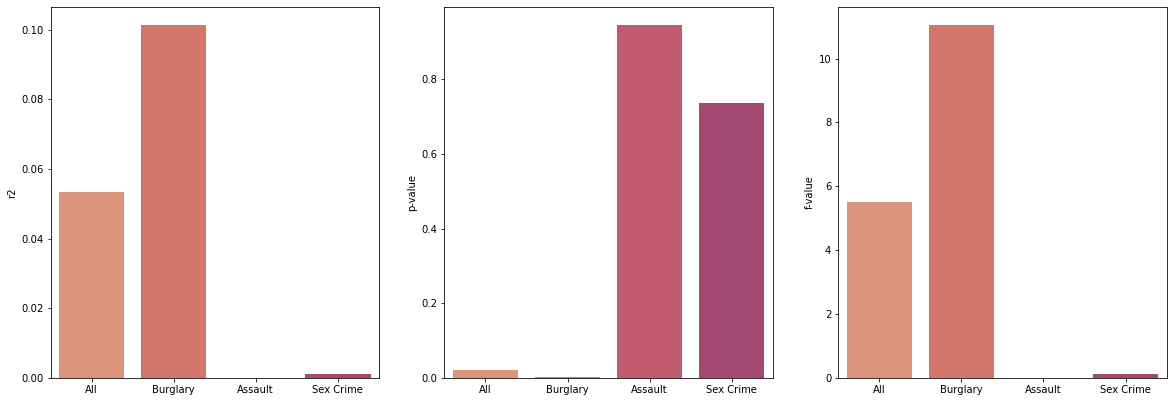

In [17]:
fig = plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(231)
ax1 = sns.barplot(x = monthly_precip_dct.index, y = 'r2', data = monthly_precip_dct)

ax2 = fig.add_subplot(232)
ax2 = sns.barplot(x = monthly_precip_dct.index, y = 'p-value', data = monthly_precip_dct)

ax3 = fig.add_subplot(233)
ax3 = sns.barplot(x = monthly_precip_dct.index, y = 'f-value', data = monthly_precip_dct)

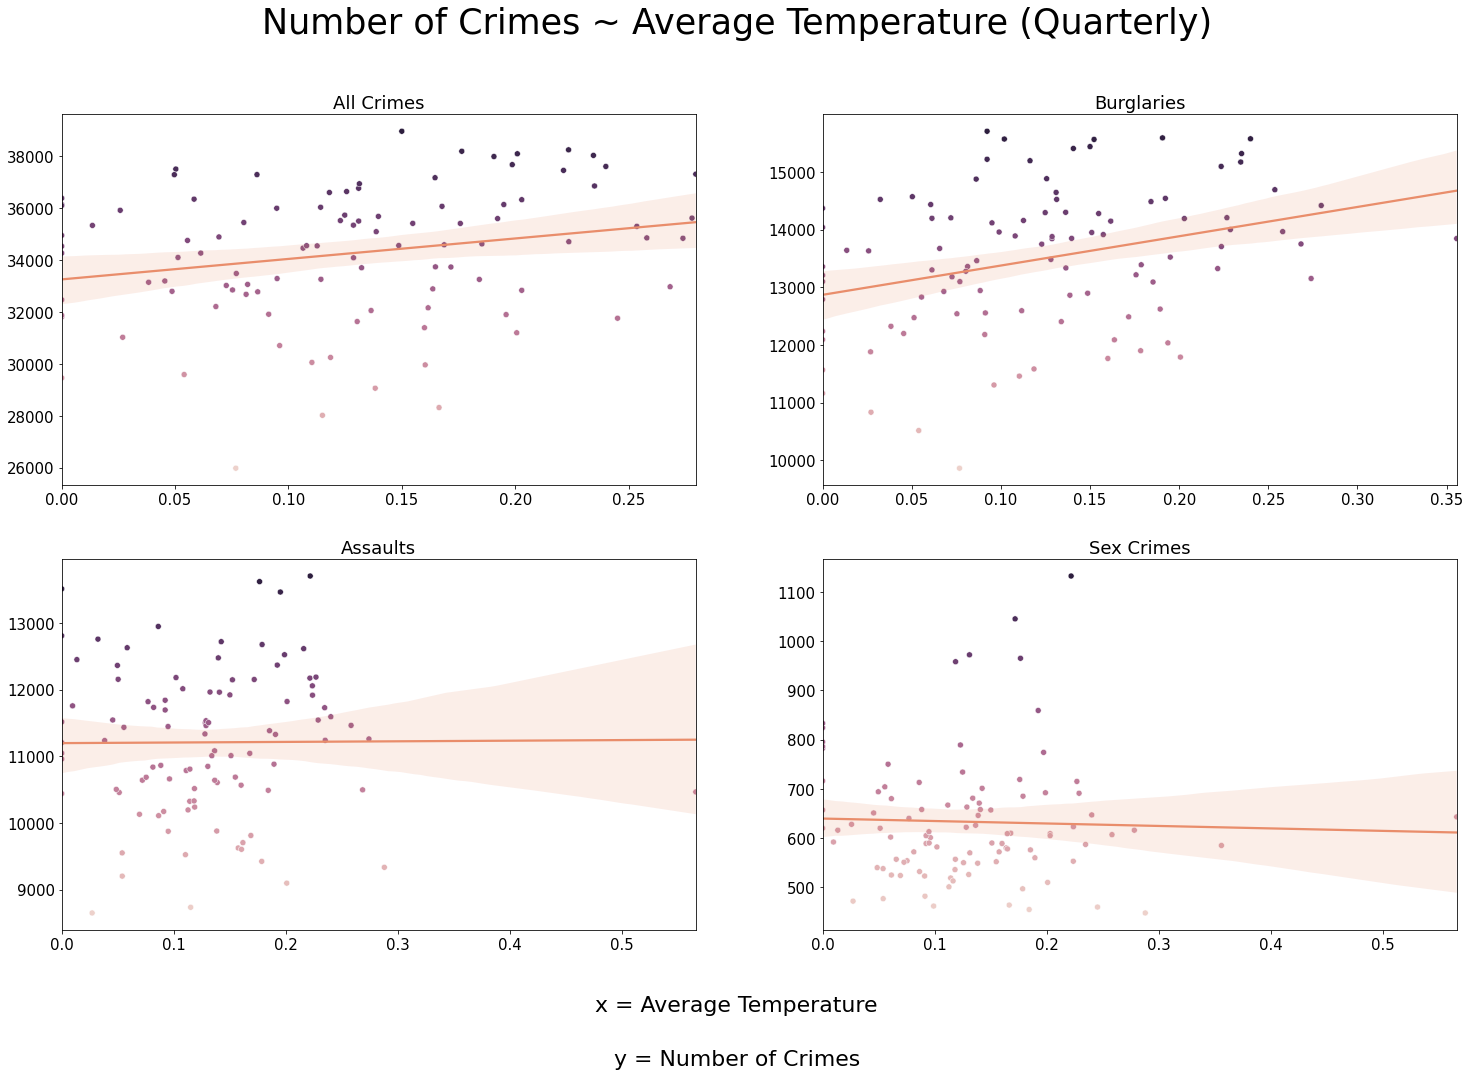

In [18]:
fig = plt.figure(figsize = (25,15))
ax1 = fig.add_subplot(221)
ax1 = sns.scatterplot(x='PRCP', y = 'OFNS_DESC', data = monthly_precip, hue = 'OFNS_DESC')
ax1 = sns.regplot(x='PRCP', y = 'OFNS_DESC', data = monthly_precip, scatter=False)
ax1.get_legend().remove()
ax1.set_title('All Crimes', fontsize = 18)
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.tick_params(axis='both', which='major', labelsize=15)


ax2 = fig.add_subplot(222)
ax2 = sns.scatterplot(x='PRCP', y = 'OFNS_DESC', data = burg_monthly_precip, hue = 'OFNS_DESC')
ax2 = sns.regplot(x='PRCP', y = 'OFNS_DESC', data = burg_monthly_precip, scatter=False)
ax2.get_legend().remove()
ax2.set_title('Burglaries', fontsize = 18)
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.tick_params(axis='both', which='major', labelsize=15)

ax3 = fig.add_subplot(223)
ax3 = sns.scatterplot(x='PRCP', y = 'OFNS_DESC', data = assault_monthly_precip, hue = 'OFNS_DESC')
ax3 = sns.regplot(x='PRCP', y = 'OFNS_DESC', data = assault_monthly_precip, scatter=False)
ax3.get_legend().remove()
ax3.set_title('Assaults', fontsize=18)
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.tick_params(axis='both', which='major', labelsize=15)


ax4 = fig.add_subplot(224)
ax4 = sns.scatterplot(x='PRCP', y = 'OFNS_DESC', data = sc_monthly_precip, hue = 'OFNS_DESC')
ax4 = sns.regplot(x='PRCP', y = 'OFNS_DESC', data = sc_monthly_precip, scatter=False)
ax4.get_legend().remove()
ax4.set_title('Sex Crimes', fontsize = 18)
ax4.set_ylabel('')
ax4.set_xlabel('')
ax4.tick_params(axis='both', which='major', labelsize=15)

fig.text(0.5, 0.05, 'x = Average Temperature', ha='center', fontsize=22)
fig.text(0.5, 0, 'y = Number of Crimes', ha='center', fontsize=22)
fig.suptitle('Number of Crimes ~ Average Temperature (Quarterly)', fontsize=35)
fig.savefig('regplot_quart.png', bbox_inches = 'tight', dpi = 200)

plt.show()

### *Quarterly Period*

In [19]:
allqprecip = pd.read_csv('all_quart_precip_final.csv')

bqprecip = pd.read_csv('burg_quart_precip_final.csv')

aqprecip = pd.read_csv('assault_quart_precip_final.csv')

sqprecip = pd.read_csv('sc_quart_precip_final.csv')

In [20]:
qprecip_lst = [get_precip(allqprecip), get_precip(bqprecip), 
               get_precip(aqprecip), get_precip(sqprecip)]

qprecip_dct = summary_csv(qprecip_lst)

### Model Results

| **Crime Type**      | **R<sup>2</sup>**| **p-value** | **f-value**| **Correlation Coefficient**|
| :--- :                |    :----:      |    :----:   |    :----:| :----: |
| All Crime |     0.164576|0.005156	|8.667847|.405
| Burglary |      0.082343|0.053170|3.948193|.286
| Assault | 0.004577	|0.347851	|0.202316|-0.062
|Sex Crime |0.020054	|0.347851|0.900425|-0.142

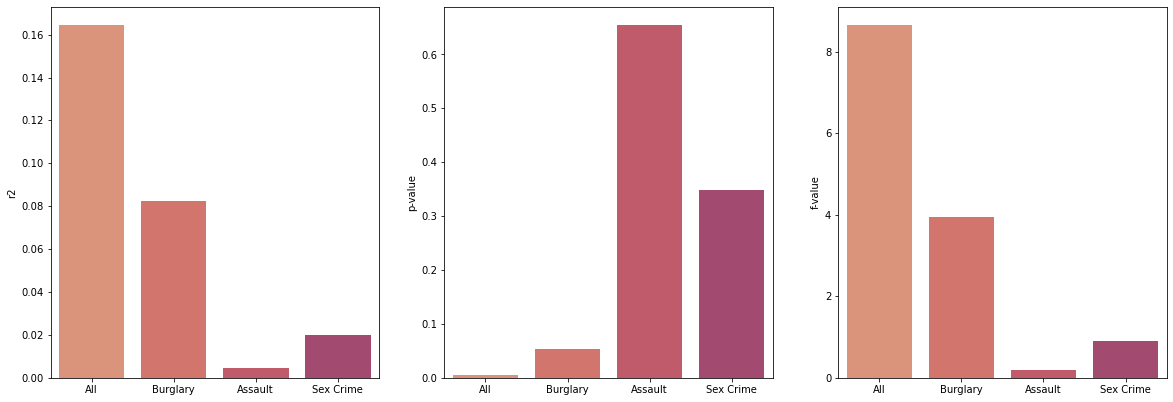

In [21]:
fig = plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(231)
ax1 = sns.barplot(x = qprecip_dct.index, y = 'r2', data = qprecip_dct)

ax2 = fig.add_subplot(232)
ax2 = sns.barplot(x = qprecip_dct.index, y = 'p-value', data = qprecip_dct)

ax3 = fig.add_subplot(233)
ax3 = sns.barplot(x = qprecip_dct.index, y = 'f-value', data = qprecip_dct)

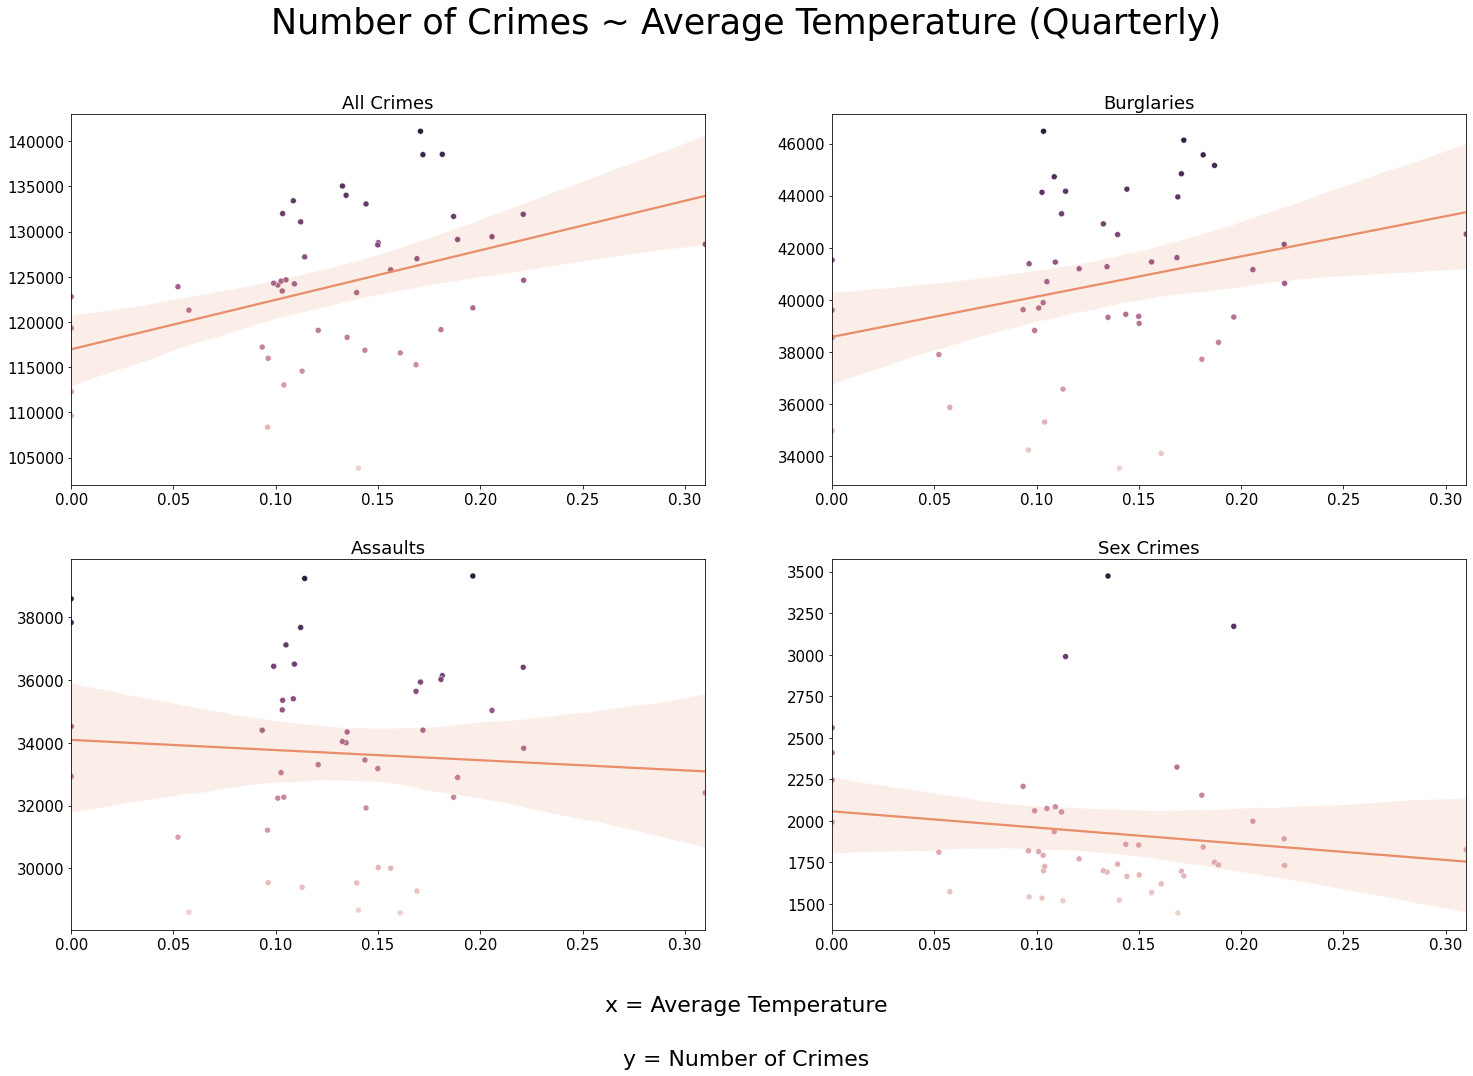

In [22]:
fig = plt.figure(figsize = (25,15))
ax1 = fig.add_subplot(221)
ax1 = sns.scatterplot(x='PRCP', y = 'OFNS_DESC', data = allqprecip, hue = 'OFNS_DESC')
ax1 = sns.regplot(x='PRCP', y = 'OFNS_DESC', data = allqprecip, scatter=False)
ax1.get_legend().remove()
ax1.set_title('All Crimes', fontsize = 18)
ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.tick_params(axis='both', which='major', labelsize=15)


ax2 = fig.add_subplot(222)
ax2 = sns.scatterplot(x='PRCP', y = 'OFNS_DESC', data = bqprecip, hue = 'OFNS_DESC')
ax2 = sns.regplot(x='PRCP', y = 'OFNS_DESC', data = bqprecip, scatter=False)
ax2.get_legend().remove()
ax2.set_title('Burglaries', fontsize = 18)
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.tick_params(axis='both', which='major', labelsize=15)

ax3 = fig.add_subplot(223)
ax3 = sns.scatterplot(x='PRCP', y = 'OFNS_DESC', data = aqprecip, hue = 'OFNS_DESC')
ax3 = sns.regplot(x='PRCP', y = 'OFNS_DESC', data = aqprecip, scatter=False)
ax3.get_legend().remove()
ax3.set_title('Assaults', fontsize=18)
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.tick_params(axis='both', which='major', labelsize=15)


ax4 = fig.add_subplot(224)
ax4 = sns.scatterplot(x='PRCP', y = 'OFNS_DESC', data = sqprecip, hue = 'OFNS_DESC')
ax4 = sns.regplot(x='PRCP', y = 'OFNS_DESC', data = sqprecip, scatter=False)
ax4.get_legend().remove()
ax4.set_title('Sex Crimes', fontsize = 18)
ax4.set_ylabel('')
ax4.set_xlabel('')
ax4.tick_params(axis='both', which='major', labelsize=15)

fig.text(0.5, 0.05, 'x = Average Temperature', ha='center', fontsize=22)
fig.text(0.5, 0, 'y = Number of Crimes', ha='center', fontsize=22)
fig.suptitle('Number of Crimes ~ Average Temperature (Quarterly)', fontsize=35)
fig.savefig('regplot_quart.png', bbox_inches = 'tight', dpi = 200)

plt.show()